# Project Notebook

The main stuff will be done here!

## What is needed?

For this, I will use `mysql`, which I will host locally. This needs to be runned for `pymssql` to work. After that I can make queries with pymssql when I connect to my local hosted server. This makes development easier. As I use a different machine from last time when I used these, I have to install them again.

**Mysql** local install:

1. Download it from their site! 
2. Install the necessary tools! (I did all)
3. ADD IT TO `PATH`
4. Check with `mysql -V` in terminal if it is installed correctly (restart my be needed needed)
5. ENJOY!

`On windows, it creates a very okeyish config file with reasonable variables.`

`On linux, there is no need to be added to path, but the config file is empty.`

**pymssql**:

1. `pip install -u pymsql`

**.ENV**

It is a good practice to create a new user with granted permissions (don't use root), but it's necessary to hide these credentials if the work is shared: create an .env file that has the information and block its upload to github!

**Helpful stuff**

https://www.digitalocean.com/community/tutorials/a-basic-mysql-tutorial

https://www.digitalocean.com/community/tutorials/how-to-create-a-new-user-and-grant-permissions-in-mysql

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import re

import sys
import os
import pathlib
import glob

import pymssql

import mysql.connector
from mysql.connector import Error
from mysql.connector import OperationalError, ProgrammingError

from dotenv import load_dotenv
load_dotenv()

True

**Usage of .env is essential in hidin credenials**

In [94]:
usr = os.getenv('user')
psswrd = os.getenv('password')

Let's test i this works

In [95]:
#how to use it
"""
# This opens a connection to the MS SQL server
conn = pymssql.connect(user=usr, 
                       password=psswrd,
                       host='localhost',
                       database='sys')

cursor = conn.cursor()
# A test query
res = cursor.execute('select * from shot;')
print(cursor.fetchone())
"""

db_connection = mysql.connector.connect(user=usr,
                                        passwd=psswrd ,
                                        host='localhost',
                                        database = 'sys',
                                        use_pure=True)

db_cursor = db_connection.cursor()
db_cursor.execute('select* from session;')
for db in db_cursor:
    print(db)

db_connection.close()
db_cursor.close()



(72, 32, 'szaboadamg@localhost', 'datamodproj', 'Sleep', None, 2830, None, None, None, '  0 ps', 0, 0, 0, 0, 0, 'NO', 'SELECT UUID from ((SELECT uuid ...  uuid2 as UUID FROM linklist))', '83.70 us', '78.46 KiB', None, None, None, None, None, None, '19796', None)
(88, 48, 'szaboadamg@localhost', 'datamodproj', 'Sleep', None, 1481, None, None, None, '  0 ps', 0, 0, 0, 0, 0, 'NO', 'SELECT distinct APPS.UUID, cou ... ORDER BY COUNT(APPS.UUID) DESC', '102.80 us', '78.71 KiB', None, None, None, None, None, None, '19796', None)
(80, 40, 'szaboadamg@localhost', 'datamodproj', 'Sleep', None, 181, None, None, None, '193.00 us', 0, 0, 22600, 0, 0, 'NO', "load data infile 'data\\_linkli ... ed by '\\r\\n'     ignore 1 rows", '178.72 ms', '257.88 KiB', None, None, None, '177.96 ms', 'COMMITTED', 'YES', '5108', 'mysql')
(94, 54, 'szaboadamg@localhost', 'sys', 'Query', None, 0, "SET @sys.statement_truncate_le ... ('statement_truncate_len', 64)", '28.31 ms', None, '1.68 ms', 1, 0, 0, 4, 0, 'YES', None

True

Now I just need to create this course's database and create the table that has the .csv loaded in...

```
    load data infile 'data\_linklist.csv'
    into table linklist
    fields terminated by ','
    lines terminated by '\n'
    ignore 1 rows;

```

THe problem is that the setup file has 2 rows specifying where the mysql server can take files from. One of them prevents `local` file insertion, the other gives a strict path.

**But this needs a well defined table beforehand.** With these, the first 3 task is complete:

1. Get the data from kaggle
2. Load the tables into a database
3. Create linklist

### Loading in the decodings

In [96]:
decoder0 = pd.read_csv("data/_decoding.csv", sep=",", encoding='cp1252')
decoder1 = pd.read_csv("data/_decoding.csv", sep=",", encoding='cp1252')
decoder0

character                                  uuid
0    25TH FLOOR STRIKE AGENT  a15f6df4-3726-5e57-b049-3e0d0de031d4
1                  4F DOCTOR  9e255c6b-966a-524b-a69b-81d81550f623
2               911 OPERATOR  3ad52c61-23c9-5aa8-bc05-cb5573504d9f
3                AARON DAVIS  c3870cc6-04d3-5cf4-8454-29b8dc0ab64f
4              ABRAHAM BROWN  2da415ec-683d-5134-aba9-d059701f5e40
..                       ...                                   ...
630         YOUNG TONY STARK  d80b9b48-16ba-59d2-a266-8b588cb77651
631               YOUNG ZURI  a3d9d45e-dc4e-529b-a4f3-cedc2cabef84
632              ZEMO'S WIFE  1f4ce560-07d2-5a20-a7e8-e1bb0e132b82
633                   ZRINKA  faf988f6-8de4-5aa5-98e3-d81e017c09d3
634                     ZURI  6076c955-c8a8-5ebe-a413-9efb6f9a7925

[635 rows x 2 columns]

In [97]:
for i in range(len(decoder1['uuid'])):
    decoder0['uuid'].loc[i] = re.sub(r'\r', '', decoder0['uuid'].loc[i]).strip()
    decoder1['uuid'].loc[i] = re.sub(r'\r', '', decoder1['uuid'].loc[i]).strip()
decoderd = dict(zip(decoder1['uuid'], decoder1['character']))

## 4. Network Visualizations

Visualizing the networks with the nodes and links. Nodes that are more connected shall be bigger.

In [98]:
import networkx as nx

In [99]:
db_connection = mysql.connector.connect(user=usr,
                                        passwd=psswrd ,
                                        host='localhost',
                                        database = 'datamodproj',
                                        use_pure=True)

Llist = []
count=0
db_cursor = db_connection.cursor()
db_cursor.execute('select* from linklist;')
for db in db_cursor:
    Llist.append(db)
    count=count+1

print(count)

db_connection.close()
db_cursor.close()

22600


True

In [100]:
Llist[1]

('a925ecc2-c223-5555-b66e-0b5b24122201',
 'ee9c03ac-4251-5042-ac85-986db9228a17')

It's strange that the `\r` is present in the returned result of the query. Regex can remove, but I have never seen such thing before. Maybe due to the loading?

In [101]:
for i in range(len(Llist)):
    sub = list(Llist[i])
    sub[1] = re.sub(r'\r', '', sub[1]).strip()
    Llist[i] = tuple(sub)
    
Llist_a = np.array(Llist)
Llist[1]

('a925ecc2-c223-5555-b66e-0b5b24122201',
 'ee9c03ac-4251-5042-ac85-986db9228a17')

Fixed!

### Graph 

https://networkx.org/documentation/stable/tutorial.html

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

In [102]:
# GRAPH

G = nx.Graph()

G.add_edges_from(Llist)

In [103]:
G.number_of_nodes(), G.number_of_edges()

(620, 10965)

This is less than the length of the linklist. Does it know that these eddes are weighted?

In [104]:
sum_node_deg = 0
for i in range(len(G.degree())):
    sum_node_deg = sum_node_deg + list(list(G.degree)[i])[1]
print(sum_node_deg) 

21930


**It knows. Yes!**

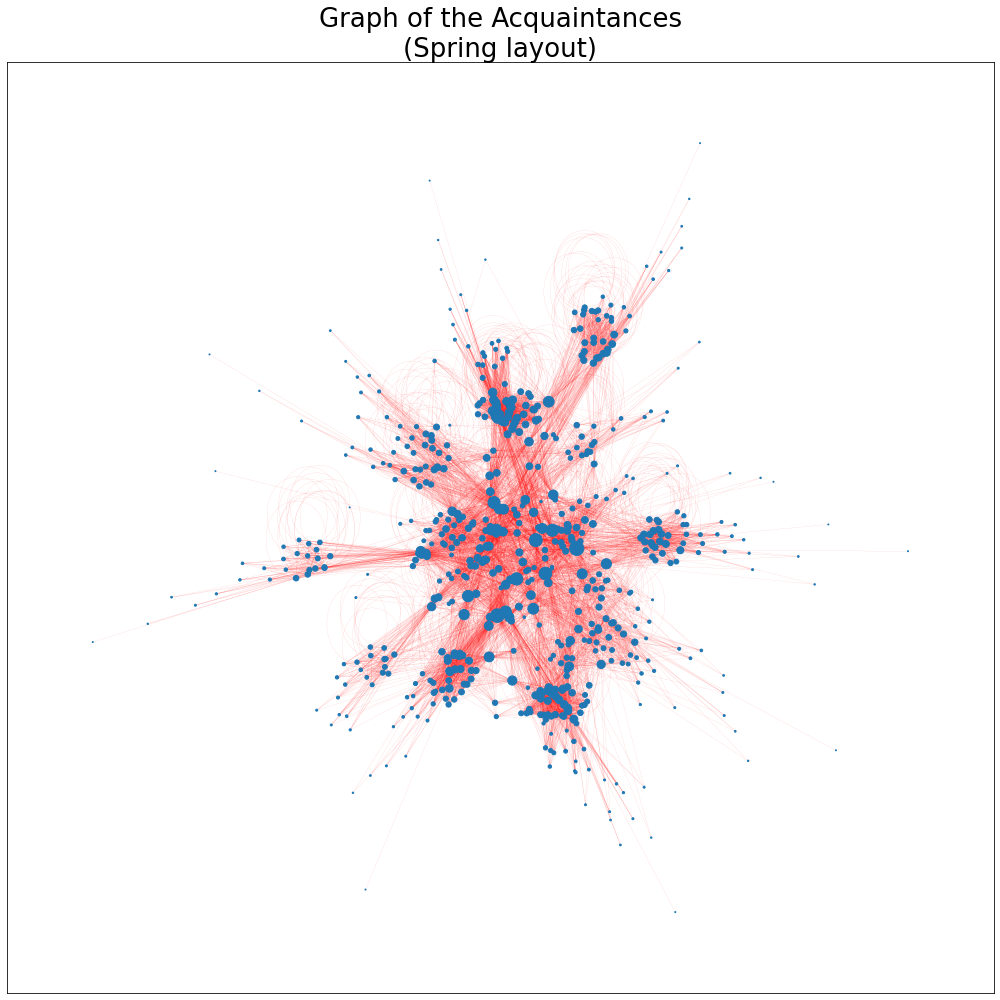

In [105]:
#Let's draw this
fig = plt.figure(figsize=(14,14))

plt.title('Graph of the Acquaintances\n(Spring layout)', fontsize=26)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                       pos,
                       nodelist = np.array(G.nodes),
                       cmap=plt.get_cmap('jet'), 
                       #node_color = values,
                       node_size = np.around(np.array(np.array(G.degree)[:,1], dtype=np.uint32)/np.max(np.array(np.array(G.degree)[:,1], dtype=np.uint32))*200))
nx.draw_networkx_edges(G,
                       pos,
                       width=0.05,
                       #edgelist=red_edges,
                       edge_color='r', 
                       arrows=False)

fig.tight_layout()

plt.show()

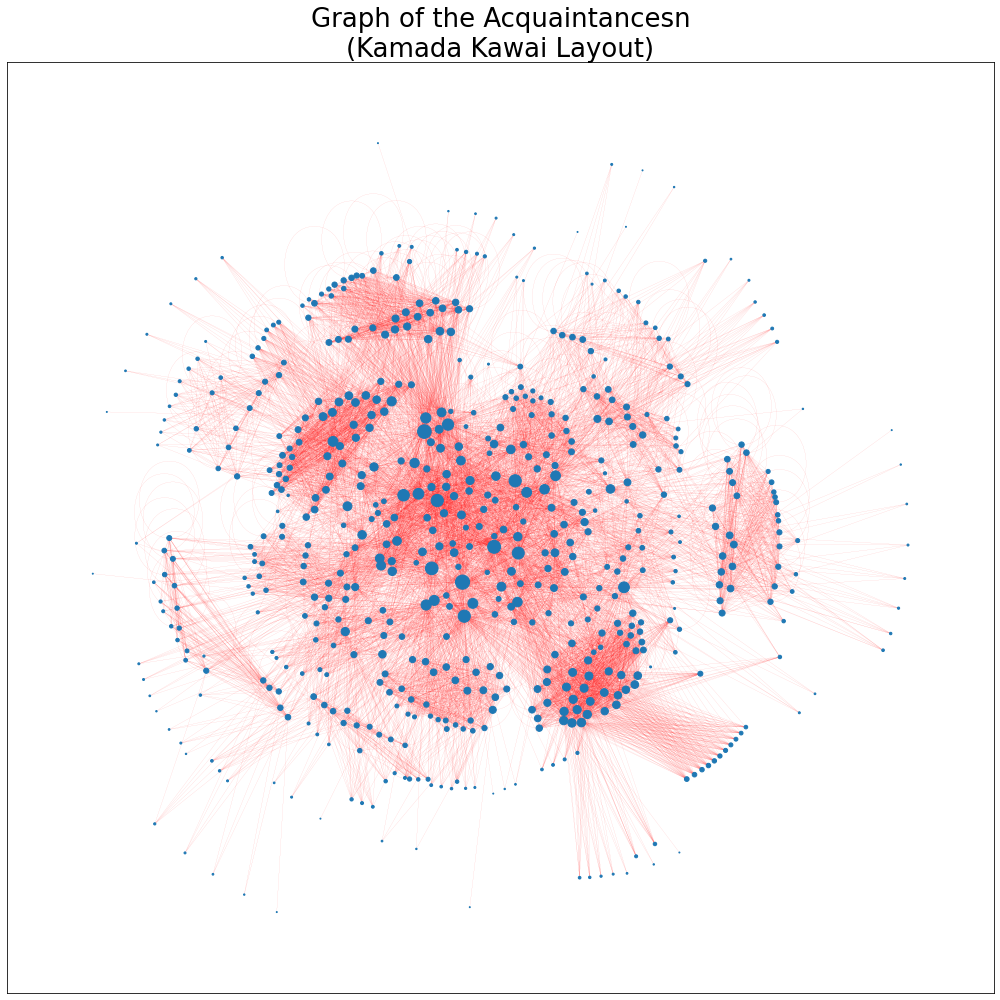

In [106]:
fig = plt.figure(figsize=(14,14))

plt.title('Graph of the Acquaintancesn\n(Kamada Kawai Layout)', fontsize=26)

pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G,
                       pos,
                       nodelist = np.array(G.nodes),
                       cmap=plt.get_cmap('jet'), 
                       #node_color = values,
                       node_size = np.around(np.array(np.array(G.degree)[:,1], dtype=np.uint32)/np.max(np.array(np.array(G.degree)[:,1], dtype=np.uint32))*200))
nx.draw_networkx_edges(G,
                       pos,
                       width=0.05,
                       #edgelist=red_edges,
                       edge_color='r', 
                       arrows=False)

fig.tight_layout()

plt.show()

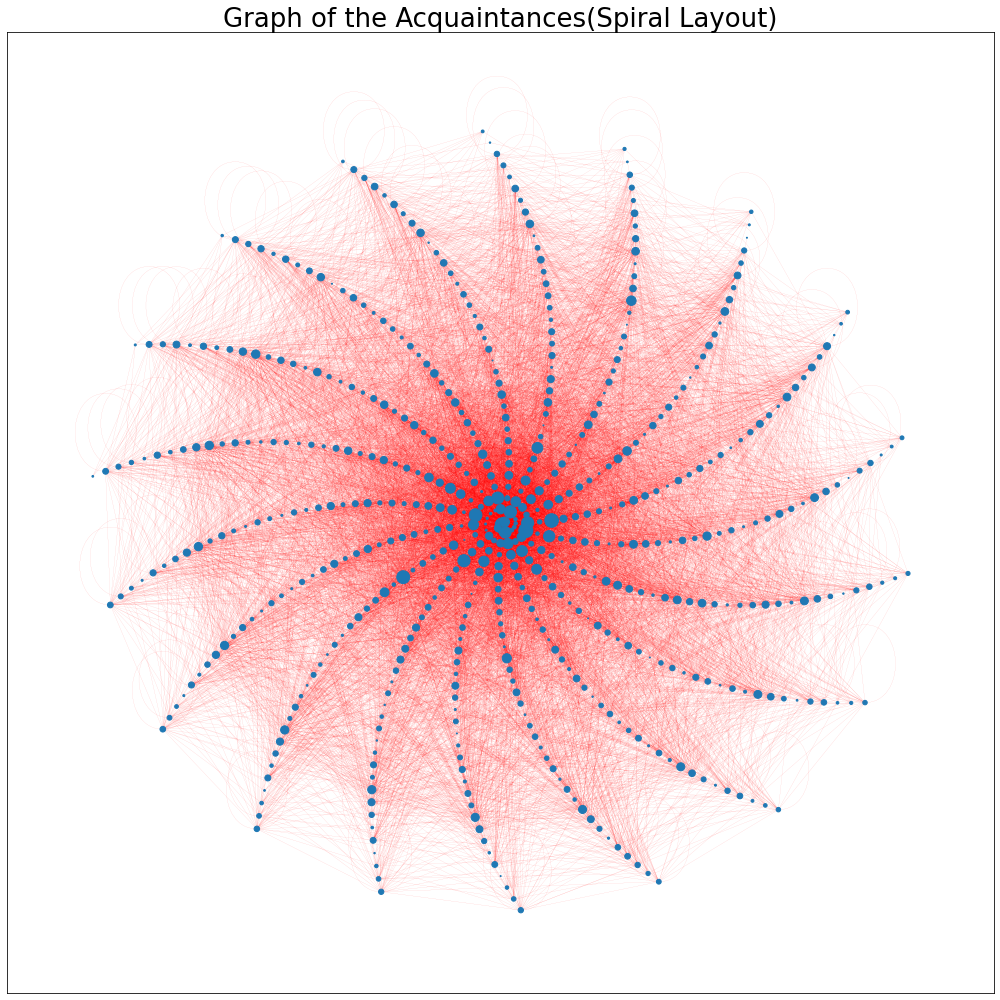

In [107]:
fig = plt.figure(figsize=(14,14))

plt.title('Graph of the Acquaintances(Spiral Layout)', fontsize=26)

pos = nx.spiral_layout(G)
nx.draw_networkx_nodes(G,
                       pos,
                       nodelist = np.array(G.nodes),
                       cmap=plt.get_cmap('jet'), 
                       #node_color = values,
                       node_size = np.around(np.array(np.array(G.degree)[:,1], dtype=np.uint32)/np.max(np.array(np.array(G.degree)[:,1], dtype=np.uint32))*200))
nx.draw_networkx_edges(G,
                       pos,
                       width=0.05,
                       #edgelist=red_edges,
                       edge_color='r', 
                       arrows=False)

fig.tight_layout()

plt.show()

These are all interesting by their looks, but the spring layout seems to be the most accurate one to show the network.

**Problem with labels**

There is a dozen of nodes present in this network, labeling them would make it crazy hard to read. Interactive plots would solve this!

https://plotly.com/python/network-graphs/

In [108]:
#import holoviews as hv always, holovws somehow fails
#import bokeh.io  fails too

import plotly.offline as py
import plotly.graph_objects as go

import plotly.express as px

In [109]:
def make_edge(x, y, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'red'),
                       hoverinfo = None,
                       mode      = 'lines')

In [110]:
#getting the positions
pos = nx.spring_layout(G)

#getting edge trace
edge_trace = []
for edge in G.edges():
    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos[char_1]
    x1, y1 = pos[char_2]
        
    trace  = make_edge([x0, x1, None], [y0, y1, None], 
                        width = 0.3)
    edge_trace.append(trace)

#creating node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        hovertemplate = '<b>%{text}</b>',
                        text      = [],                      
                        
                        
                        #textposition = "top center",
                        textfont_size = 8,
                        mode      = 'markers',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
#getting node trace
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*np.log(G.degree()[node]+1) ])
    node_trace['text'] += tuple(['<b>' + decoderd[node] + '</b> : <b>' + str(G.degree()[node]) + '<b>'])
    
    
# Customize layout

layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
    height = 800,
    width = 800
)


# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()

Plotly express could make it better as it can handle pandas dataframes. Creating such dataframe could solve most of my hoverinfo issues. This does it for now!

## 5. Degree Distribution.

To get the degree distribution of this undirected and weighted network, I just need to count the appearences of each node in the network and after that I need to count the appearences of such individual degrees.

In [125]:
#degree
command5 = ('SELECT distinct Ks.K_C, count(Ks.K_C) from '+
            '('
            'SELECT distinct APPS.UUID as K, count(APPS.UUID) as K_C from '
            '((SELECT uuid1 as UUID FROM linklist)'+
            'UNION ALL' +
            '(SELECT uuid2 as UUID FROM linklist)) as APPS '+
            'GROUP BY APPS.UUID ' + 
            'ORDER BY COUNT(APPS.UUID) DESC ' + 
            ') as Ks '+
            'GROUP BY Ks.K_C '+
            'ORDER BY COUNT(Ks.K_C) '+
            ';'
           )

            

db_connection = mysql.connector.connect(user=usr,
                                        passwd=psswrd ,
                                        host='localhost',
                                        database = 'datamodproj',
                                        use_pure=False)
count=0
query = []
db_cursor = db_connection.cursor()
db_cursor.execute(command5)
for db in db_cursor:
    query.append(list(db))
    count=count+1
print(count)
query = np.array(query)

db_connection.close()
db_cursor.close()

115


True

In [126]:
query

array([[602,   1],
       [528,   1],
       [472,   1],
       [422,   1],
       [420,   1],
       [410,   1],
       [398,   1],
       [372,   1],
       [332,   1],
       [326,   1],
       [308,   1],
       [276,   1],
       [270,   1],
       [260,   1],
       [258,   1],
       [250,   1],
       [248,   1],
       [232,   1],
       [230,   1],
       [226,   1],
       [212,   1],
       [206,   1],
       [202,   1],
       [198,   1],
       [194,   1],
       [192,   1],
       [190,   1],
       [188,   1],
       [184,   1],
       [178,   1],
       [174,   1],
       [172,   1],
       [166,   1],
       [154,   1],
       [146,   1],
       [144,   1],
       [132,   1],
       [262,   2],
       [176,   2],
       [164,   2],
       [158,   2],
       [152,   2],
       [150,   2],
       [142,   2],
       [136,   2],
       [134,   2],
       [130,   2],
       [126,   2],
       [156,   3],
       [148,   3],
       [140,   3],
       [138,   3],
       [118,

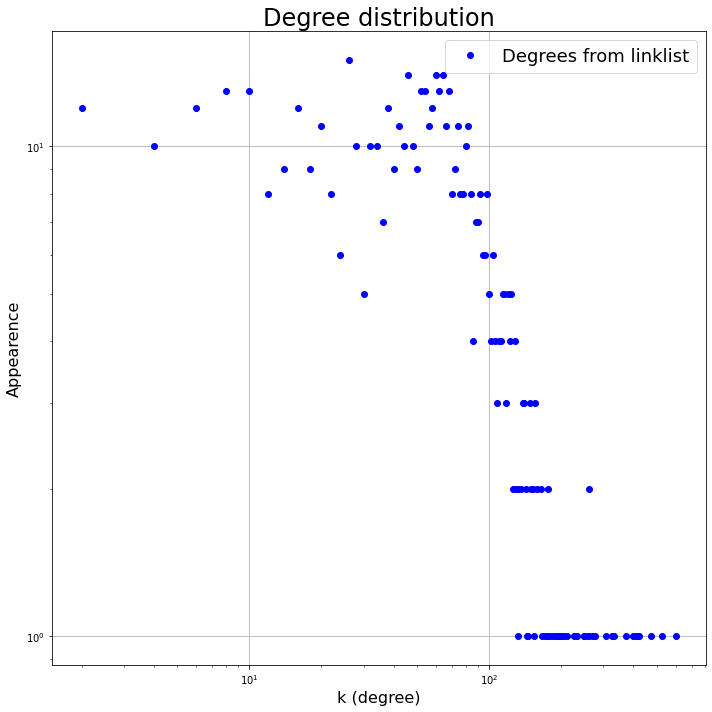

In [143]:
fig = plt.figure(figsize=(10,10))
plt.title("Degree distribution", fontsize=24)
plt.plot(query[:,0], query[:,1], " bo",  label="Degrees from linklist")

plt.yscale('log')
plt.xscale('log')


plt.xlabel("k (degree)", fontsize=16)
plt.ylabel("Appearence", fontsize=16)


fig.tight_layout()
plt.legend(loc='best', fontsize=18)
plt.grid()
plt.show()

This does not seem to be random be like the degree distribution obtain from Erdős-Rényi random graphs, and I think this is not random at all. **Existence of hubs: high degree nodes**

**NOTE**: for some reason, the degree in networkx Graph object and the degrees calculated from my linklist differs.

## 6. Clustering Coefficient and its average and the global clustering coefficient

After some reading, it turns out that in SQL, the speed is not good for calculating such stuff.

For calculating the clustering coefficient of node i whih has k$_i$ degree and L links to is neighbors, the equation is simple:
$$ C_i = \frac{2 L}{k_i \cdot (k_i-1)} $$
$$ < C_{avg} > = \frac{1}{N} \sum_i C_i $$ 

where $< C_{avg} >$ is the average clustering coefficient and N is the number of nodes. The global clustering coefficient is calculated in a different way:

$$ C = \frac{\text{number of closed triplets}}{ \text{number of all triplets}} $$

Where a triplet is 3 nodes connected with 2 egdes (open) or with 3 edges (closed). My plan is to do this in python and do some tinkering in SQL. I didn't find anything about calculating this in SQL online, so my guess is that there are packeges that can handle this with ease.

**SUGGESTION**

Triangles and triples: triangle with 3 vertex and 3 edge, triple with 3 vertex with 2 edge. For a node $\frac{triangles}{triples}$ gives the $C_i$ we are looking for. But how to get triangles and triples?

My though is doing joins. If its possible to do 3 joins with the first and last value to match, its a triangle, if 3 joins are possible, then triangle.

**WAIT. HOLD ON**

What I could do this with doing 1 joins on linklist with itself. Then it will have 3 values, which are my triples (as I don't know if they form a triangle or not). With doing 4 joins, I can get triangles, which has to be closed, so their first and last values have to match. Counting the triples and triangles and dividing them could give me the global clustering coefficient.

How to do this with local clustering coefficient? It may be simple,but I only have to see if a row contains my value for the node and  I just have to see how many triangles has it divided by how many triples has it.


**END THOUGHTS**

So the `global clustering` coefficient could be done like this: make the triangles and triples by joins (triangles by 2 inner joins but their first and last point has to match: this way I don't need to care about permutations of a possible 3 points that are a  triangle) and count triangles and triples and divide them.

The `local clustering` coefficient could be done like this: create the triangles table with joins, see how many triangles has to node in it (doesn't have to be an endpoint) and then double it and divide by $k_i \cdot (k_i-1)$ as I can know the degree of the node before hand.

In [147]:
len(list(G.edges))

10965

## 7. Degree Correlation